In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from keras.optimizers import Adam

import tensorflow as tf

In [3]:
turbine_data= pd.read_csv('gas_turbines (1).csv')

In [4]:
turbine_data

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [5]:
turbine_data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [6]:
turbine_data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [7]:
turbine_data.columns

Index(['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'TEY', 'CDP', 'CO',
       'NOX'],
      dtype='object')

In [8]:
turbine_data.describe()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
count,15039.000000,15039.00000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000,15039.000000
mean,17.764381,1013.19924,79.124174,4.200294,25.419061,1083.798770,545.396183,134.188464,12.102353,1.972499,68.190934
std,7.574323,6.41076,13.793439,0.760197,4.173916,16.527806,7.866803,15.829717,1.103196,2.222206,10.470586
min,0.522300,985.85000,30.344000,2.087400,17.878000,1000.800000,512.450000,100.170000,9.904400,0.000388,27.765000
25%,11.408000,1008.90000,69.750000,3.723900,23.294000,1079.600000,542.170000,127.985000,11.622000,0.858055,61.303500
50%,18.186000,1012.80000,82.266000,4.186200,25.082000,1088.700000,549.890000,133.780000,12.025000,1.390200,66.601000
75%,23.862500,1016.90000,90.043500,4.550900,27.184000,1096.000000,550.060000,140.895000,12.578000,2.160400,73.935500
max,34.929000,1034.20000,100.200000,7.610600,37.402000,1100.800000,550.610000,174.610000,15.081000,44.103000,119.890000


C:\Users\shiji\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


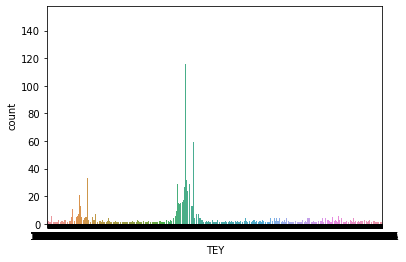

In [9]:
sns.countplot(turbine_data ['TEY'])
plt.show()

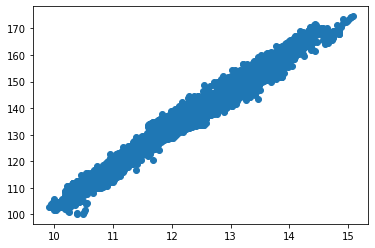

In [10]:
plt.scatter(x="CDP",y="TEY",data=turbine_data)

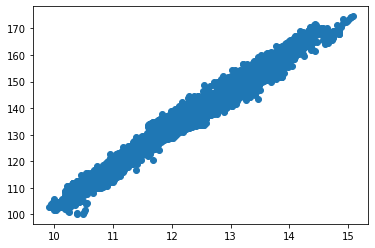

In [11]:
plt.scatter(x="CDP",y="TEY",data=turbine_data)

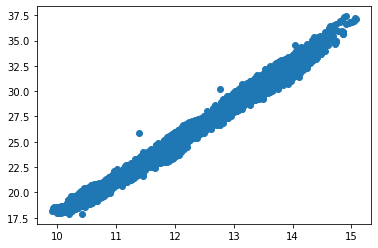

In [12]:
plt.scatter(x="CDP",y="GTEP",data=turbine_data)

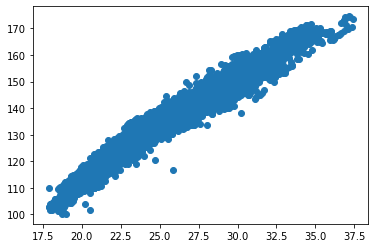

In [13]:
plt.scatter(x="GTEP",y="TEY",data=turbine_data)

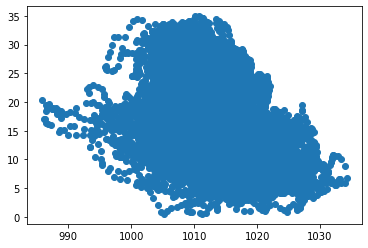

In [14]:
plt.scatter(x="AP",y="AT",data=turbine_data)

<AxesSubplot:>

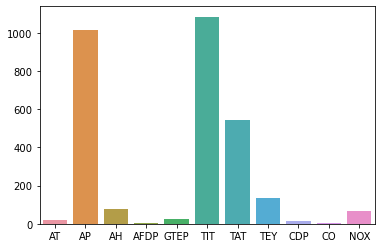

In [15]:
sns.barplot(data=turbine_data)

(array([ 247., 2671.,  474.,  528., 7145.,  462.,  989., 1215., 1160.,
         148.]),
 array([100.17 , 107.614, 115.058, 122.502, 129.946, 137.39 , 144.834,
        152.278, 159.722, 167.166, 174.61 ]),
 <BarContainer object of 10 artists>)

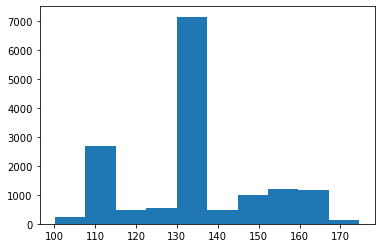

In [16]:
plt.hist(turbine_data['TEY'])

(array([  29.,   47.,  206.,  973., 3477., 4783., 3086., 1668.,  697.,
          73.]),
 array([ 985.85 ,  990.685,  995.52 , 1000.355, 1005.19 , 1010.025,
        1014.86 , 1019.695, 1024.53 , 1029.365, 1034.2  ]),
 <BarContainer object of 10 artists>)

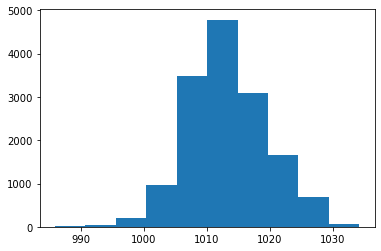

In [17]:
plt.hist(turbine_data['AP'])

(array([5.000e+00, 1.000e+00, 5.000e+01, 1.630e+02, 3.690e+02, 2.064e+03,
        6.780e+02, 4.960e+02, 4.906e+03, 6.307e+03]),
 array([1000.8, 1010.8, 1020.8, 1030.8, 1040.8, 1050.8, 1060.8, 1070.8,
        1080.8, 1090.8, 1100.8]),
 <BarContainer object of 10 artists>)

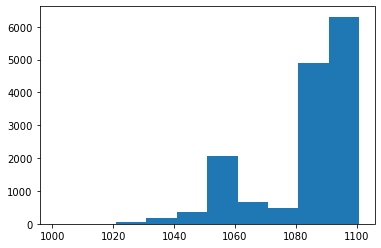

In [18]:
plt.hist(turbine_data['TIT'])

(array([   14.,    39.,    85.,   556.,   954.,   776.,   776.,   688.,
          525., 10626.]),
 array([512.45 , 516.266, 520.082, 523.898, 527.714, 531.53 , 535.346,
        539.162, 542.978, 546.794, 550.61 ]),
 <BarContainer object of 10 artists>)

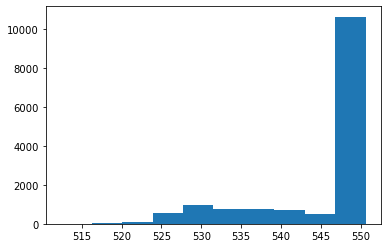

In [19]:
plt.hist(turbine_data['TAT'])

In [20]:
x= turbine_data[['AT', 'AP', 'AH', 'AFDP', 'GTEP', 'TIT', 'TAT', 'CDP', 'CO', 'NOX']]

In [21]:
x

,AT,AP,AH,AFDP,GTEP,TIT,TAT,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...
15034,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,10.400,4.5186,79.559
15035,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,10.433,4.8470,79.917
15036,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,10.483,7.9632,90.912
15037,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,10.533,6.2494,93.227


In [22]:
y= turbine_data['TEY']

In [23]:
y

0        114.70
1        114.72
2        114.71
3        114.72
4        114.72
          ...  
15034    111.61
15035    111.78
15036    110.19
15037    110.74
15038    111.58
Name: TEY, Length: 15039, dtype: float64

TUNING : BATCH SIZE AND EPOCH

In [24]:
from sklearn.model_selection import GridSearchCV, KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import Adam

In [25]:
# create a sequential model
def create_model():
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam()
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

In [26]:
model= KerasRegressor(build_fn=create_model, verbose=0)
# create grid search model
batch_size=[50,100, 200, 400, 800, 1000]
epochs=[10,50,100]

param_grid= dict(batch_size= batch_size, epochs=epochs)
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x,y)

C:\Users\shiji\AppData\Local\Temp\ipykernel_26528\4158208720.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasRegressor(build_fn=create_model, verbose=0)


Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5; 1/18] START batch_size=50, epochs=10...................................
[CV 1/5; 1/18] END .batch_size=50, epochs=10;, score=-196.971 total time=   7.6s
[CV 2/5; 1/18] START batch_size=50, epochs=10...................................
[CV 2/5; 1/18] END ..batch_size=50, epochs=10;, score=-62.630 total time=   6.3s
[CV 3/5; 1/18] START batch_size=50, epochs=10...................................
[CV 3/5; 1/18] END .batch_size=50, epochs=10;, score=-146.762 total time=   6.3s
[CV 4/5; 1/18] START batch_size=50, epochs=10...................................
[CV 4/5; 1/18] END .batch_size=50, epochs=10;, score=-177.323 total time=   6.0s
[CV 5/5; 1/18] START batch_size=50, epochs=10...................................
[CV 5/5; 1/18] END .batch_size=50, epochs=10;, score=-172.647 total time=   6.1s
[CV 1/5; 2/18] START batch_size=50, epochs=50...................................
[CV 1/5; 2/18] END ...batch_size=50, epochs=50;,

[CV 1/5; 11/18] END batch_size=400, epochs=50;, score=-16896.164 total time=   5.7s
[CV 2/5; 11/18] START batch_size=400, epochs=50.................................
[CV 2/5; 11/18] END batch_size=400, epochs=50;, score=-99.245 total time=   5.4s
[CV 3/5; 11/18] START batch_size=400, epochs=50.................................
[CV 3/5; 11/18] END batch_size=400, epochs=50;, score=-263.659 total time=   4.4s
[CV 4/5; 11/18] START batch_size=400, epochs=50.................................
[CV 4/5; 11/18] END batch_size=400, epochs=50;, score=-196.343 total time=   4.9s
[CV 5/5; 11/18] START batch_size=400, epochs=50.................................
[CV 5/5; 11/18] END batch_size=400, epochs=50;, score=-15682.607 total time=   4.9s
[CV 1/5; 12/18] START batch_size=400, epochs=100................................
[CV 1/5; 12/18] END batch_size=400, epochs=100;, score=-17.690 total time=   8.9s
[CV 2/5; 12/18] START batch_size=400, epochs=100................................
[CV 2/5; 12/18] END

In [27]:
# results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-1.819022285938263, using {'batch_size': 50, 'epochs': 100}
-151.26661834716796,47.12058833745586 with: {'batch_size': 50, 'epochs': 10}
-3085.73688313961,6165.3382885173305 with: {'batch_size': 50, 'epochs': 50}
-1.819022285938263,0.8644982141763923 with: {'batch_size': 50, 'epochs': 100}
-214.9749282836914,68.1831972900518 with: {'batch_size': 100, 'epochs': 10}
-5.017443227767944,3.810472882834838 with: {'batch_size': 100, 'epochs': 50}
-2.4884469985961912,1.2045083716272498 with: {'batch_size': 100, 'epochs': 100}
-3894.277619934082,7362.521983654453 with: {'batch_size': 200, 'epochs': 10}
-1944.3014785766602,3852.5976560280565 with: {'batch_size': 200, 'epochs': 50}
-4.291040706634521,2.2996587000437314 with: {'batch_size': 200, 'epochs': 100}
-238.21359100341797,72.03108007361926 with: {'batch_size': 400, 'epochs': 10}
-6627.603854370117,7898.3135904914725 with: {'batch_size': 400, 'epochs': 50}
-3562.846150588989,7060.374936766492 with: {'batch_size': 400, 'epochs': 100}
-2

In [28]:
from keras.layers import Dropout

# defining model
def create_model_lr_drate(learning_rate,dropout_rate):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(8, kernel_initializer= 'normal', activation='relu'))
  model.add(Dropout(dropout_rate))
  model.add(Dense(1, kernel_initializer= 'normal')) 
  adam= Adam(learning_rate= learning_rate)
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

# Define regression model
model= KerasRegressor(build_fn=create_model_lr_drate, verbose=0, batch_size=100, epochs=100)
learning_rate=[0.001, 0.01, 0.1, 0.2, 0.5]
dropout_rate=[0, 0.1, 0.2]

param_grid= dict(learning_rate= learning_rate, dropout_rate=dropout_rate)
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x,y)


Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV 1/5; 1/15] START dropout_rate=0, learning_rate=0.001........................


C:\Users\shiji\AppData\Local\Temp\ipykernel_26528\2203052668.py:18: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasRegressor(build_fn=create_model_lr_drate, verbose=0, batch_size=100, epochs=100)


[CV 1/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-4.694 total time=  26.6s
[CV 2/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 2/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-2.004 total time=  26.2s
[CV 3/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 3/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-1.833 total time=  27.3s
[CV 4/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 4/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-1.492 total time=  26.5s
[CV 5/5; 1/15] START dropout_rate=0, learning_rate=0.001........................
[CV 5/5; 1/15] END dropout_rate=0, learning_rate=0.001;, score=-1.785 total time=  27.5s
[CV 1/5; 2/15] START dropout_rate=0, learning_rate=0.01.........................
[CV 1/5; 2/15] END dropout_rate=0, learning_rate=0.01;, score=-4.798 total time=  26.3s
[CV 2/5; 2/15] START dropout_rate=0, learning_rate=0.01.......

[CV 4/5; 10/15] END dropout_rate=0.1, learning_rate=0.5;, score=-236.576 total time=  32.9s
[CV 5/5; 10/15] START dropout_rate=0.1, learning_rate=0.5.......................
[CV 5/5; 10/15] END dropout_rate=0.1, learning_rate=0.5;, score=-255.973 total time=  34.1s
[CV 1/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 1/5; 11/15] END dropout_rate=0.2, learning_rate=0.001;, score=-110.615 total time=  33.2s
[CV 2/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 2/5; 11/15] END dropout_rate=0.2, learning_rate=0.001;, score=-26.990 total time=  33.9s
[CV 3/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 3/5; 11/15] END dropout_rate=0.2, learning_rate=0.001;, score=-127.646 total time=  34.2s
[CV 4/5; 11/15] START dropout_rate=0.2, learning_rate=0.001.....................
[CV 4/5; 11/15] END dropout_rate=0.2, learning_rate=0.001;, score=-37.211 total time=  33.9s
[CV 5/5; 11/15] START dropout_rate=0.

In [37]:
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-1.3011948227882386, using {'neuron1': 16, 'neuron2': 8, 'neuron3': 16}
-2.19440758228302,1.0443448174302217 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 4}
-2.4271995306015013,1.86841396499648 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 8}
-2.4003587484359743,1.186068928332325 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 16}
-2.082274329662323,1.1449612374853417 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 4}
-2.5242130517959596,1.9026519850442025 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 8}
-1.716244924068451,0.90564946055626 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 16}
-1.991679036617279,1.507661797396693 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 4}
-1.5725339293479919,0.6366260220435878 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 8}
-1.9218933224678039,0.7522084227485658 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 16}
-1.760902500152588,0.7287568501076839 with: {'neuron1': 8, 'neuron2': 4, 'neuron3': 4}
-2.2215805888175963,1.5326624835432123 with: {'ne

In [30]:
def create_model_af_ker_ini(activation_function,init):
  model= Sequential()
  model.add(Dense(10, input_dim=10, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(8, kernel_initializer= init, activation=activation_function))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= init, activation='linear')) 
  adam= Adam(learning_rate= 0.001)
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model

In [31]:
model= KerasRegressor(build_fn=create_model_af_ker_ini, verbose=0, batch_size=100, epochs=100)
activation_function=['linear', 'relu']
init=['uniform', 'normal', 'zero']

param_grid= dict(activation_function= activation_function, init=init)
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x,y)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5; 1/6] START activation_function=linear, init=uniform....................


C:\Users\shiji\AppData\Local\Temp\ipykernel_26528\416632234.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasRegressor(build_fn=create_model_af_ker_ini, verbose=0, batch_size=100, epochs=100)


[CV 1/5; 1/6] END activation_function=linear, init=uniform;, score=-4.487 total time=  24.1s
[CV 2/5; 1/6] START activation_function=linear, init=uniform....................
[CV 2/5; 1/6] END activation_function=linear, init=uniform;, score=-0.894 total time=  17.9s
[CV 3/5; 1/6] START activation_function=linear, init=uniform....................
[CV 3/5; 1/6] END activation_function=linear, init=uniform;, score=-1.633 total time=  17.2s
[CV 4/5; 1/6] START activation_function=linear, init=uniform....................
[CV 4/5; 1/6] END activation_function=linear, init=uniform;, score=-1.059 total time=  16.9s
[CV 5/5; 1/6] START activation_function=linear, init=uniform....................
[CV 5/5; 1/6] END activation_function=linear, init=uniform;, score=-1.521 total time=  17.4s
[CV 1/5; 2/6] START activation_function=linear, init=normal.....................
[CV 1/5; 2/6] END activation_function=linear, init=normal;, score=-3.271 total time=  19.7s
[CV 2/5; 2/6] START activation_functio

In [32]:
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-1.6343252301216125, using {'activation_function': 'linear', 'init': 'normal'}
-1.9187719464302062,1.3134955662967402 with: {'activation_function': 'linear', 'init': 'uniform'}
-1.6343252301216125,0.8805899082571969 with: {'activation_function': 'linear', 'init': 'normal'}
-15175.9587890625,820.9058042504835 with: {'activation_function': 'linear', 'init': 'zero'}
-2.5840378046035766,1.6256156692739328 with: {'activation_function': 'relu', 'init': 'uniform'}
-3083.332284402847,6160.284825202371 with: {'activation_function': 'relu', 'init': 'normal'}
-15175.9609375,820.9176188586715 with: {'activation_function': 'relu', 'init': 'zero'}


In [33]:
def create_model_neuron(neuron1,neuron2, neuron3):
  model= Sequential()
  model.add(Dense(neuron1, input_dim=10, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron2, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(neuron3, kernel_initializer= 'normal', activation='linear'))
  model.add(Dropout(0))
  model.add(Dense(1, kernel_initializer= 'normal', activation='linear')) 
  adam= Adam(learning_rate= 0.001)
# Compile model
  model.compile(loss='mean_squared_error', optimizer=adam)
  return model


In [34]:
model= KerasRegressor(build_fn=create_model_neuron, verbose=0, batch_size=100, epochs=100)
neuron1=[4,8,16]
neuron2=[4,8,16]
neuron3=[4,8,16]
param_grid= dict(neuron1= neuron1, neuron2=neuron2,neuron3=neuron3 )
grid= GridSearchCV(estimator=model, param_grid=param_grid, cv= KFold(), verbose=10 )
grid_result= grid.fit(x,y)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................


C:\Users\shiji\AppData\Local\Temp\ipykernel_26528\1206552891.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  model= KerasRegressor(build_fn=create_model_neuron, verbose=0, batch_size=100, epochs=100)


[CV 1/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-4.187 total time=  17.3s
[CV 2/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 2/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-1.394 total time=  17.4s
[CV 3/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 3/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-1.864 total time=  17.3s
[CV 4/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 4/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-1.339 total time=  17.3s
[CV 5/5; 1/27] START neuron1=4, neuron2=4, neuron3=4............................
[CV 5/5; 1/27] END neuron1=4, neuron2=4, neuron3=4;, score=-2.188 total time=  17.0s
[CV 1/5; 2/27] START neuron1=4, neuron2=4, neuron3=8............................
[CV 1/5; 2/27] END neuron1=4, neuron2=4, neuron3=8;, score=-5.934 total time=  17.7s
[CV 2/5; 2/27] START neuron1=4, neuron2=4, neuron3=8............................
[CV 

[CV 1/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-5.160 total time=  17.5s
[CV 2/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 2/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-0.779 total time=  17.1s
[CV 3/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 3/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-1.632 total time=  17.0s
[CV 4/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 4/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-1.399 total time=  17.3s
[CV 5/5; 11/27] START neuron1=8, neuron2=4, neuron3=8...........................
[CV 5/5; 11/27] END neuron1=8, neuron2=4, neuron3=8;, score=-2.138 total time=  18.0s
[CV 1/5; 12/27] START neuron1=8, neuron2=4, neuron3=16..........................
[CV 1/5; 12/27] END neuron1=8, neuron2=4, neuron3=16;, score=-2.512 total time=  17.3s
[CV 2/5; 12/27] START neuron1=8, neuron2=4, neuron3=16........................

[CV 5/5; 20/27] END neuron1=16, neuron2=4, neuron3=8;, score=-2.736 total time=  16.9s
[CV 1/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 1/5; 21/27] END neuron1=16, neuron2=4, neuron3=16;, score=-4.927 total time=  17.1s
[CV 2/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 2/5; 21/27] END neuron1=16, neuron2=4, neuron3=16;, score=-1.219 total time=  17.6s
[CV 3/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 3/5; 21/27] END neuron1=16, neuron2=4, neuron3=16;, score=-1.266 total time=  17.1s
[CV 4/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 4/5; 21/27] END neuron1=16, neuron2=4, neuron3=16;, score=-1.570 total time=  17.3s
[CV 5/5; 21/27] START neuron1=16, neuron2=4, neuron3=16.........................
[CV 5/5; 21/27] END neuron1=16, neuron2=4, neuron3=16;, score=-2.436 total time=  17.5s
[CV 1/5; 22/27] START neuron1=16, neuron2=8, neuron3=4..............

In [35]:
# summerize results
print('Best:{}, using {}'.format(grid_result.best_score_, grid_result.best_params_))
means= grid_result.cv_results_['mean_test_score']
stds= grid_result.cv_results_['std_test_score']
params= grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best:-1.3011948227882386, using {'neuron1': 16, 'neuron2': 8, 'neuron3': 16}
-2.19440758228302,1.0443448174302217 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 4}
-2.4271995306015013,1.86841396499648 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 8}
-2.4003587484359743,1.186068928332325 with: {'neuron1': 4, 'neuron2': 4, 'neuron3': 16}
-2.082274329662323,1.1449612374853417 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 4}
-2.5242130517959596,1.9026519850442025 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 8}
-1.716244924068451,0.90564946055626 with: {'neuron1': 4, 'neuron2': 8, 'neuron3': 16}
-1.991679036617279,1.507661797396693 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 4}
-1.5725339293479919,0.6366260220435878 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 8}
-1.9218933224678039,0.7522084227485658 with: {'neuron1': 4, 'neuron2': 16, 'neuron3': 16}
-1.760902500152588,0.7287568501076839 with: {'neuron1': 8, 'neuron2': 4, 'neuron3': 4}
-2.2215805888175963,1.5326624835432123 with: {'ne